In [1]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import custom 

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

custom_WEIGHTS_PATH = os.path.join(MODEL_DIR, "mask_rcnn_damage_0010.h5")  # TODO: update this path

config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "customImages")

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
    
# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

class_names = ['BG', 'person']

Using TensorFlow backend.
W1030 12:09:55.223200 22620 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1030 12:09:55.231180 22620 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1030 12:09:55.235168 22620 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1030 12:09:55.271075 22620 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.

Loading weights  D:\MachineLearning\damageCar\logs\mask_rcnn_damage_0010.h5


['test.jpg']
Processing 1 images
image                    shape: (720, 1200, 3)        min:    0.00000  max:  255.00000  uint8


d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1200.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
씨발
씨발


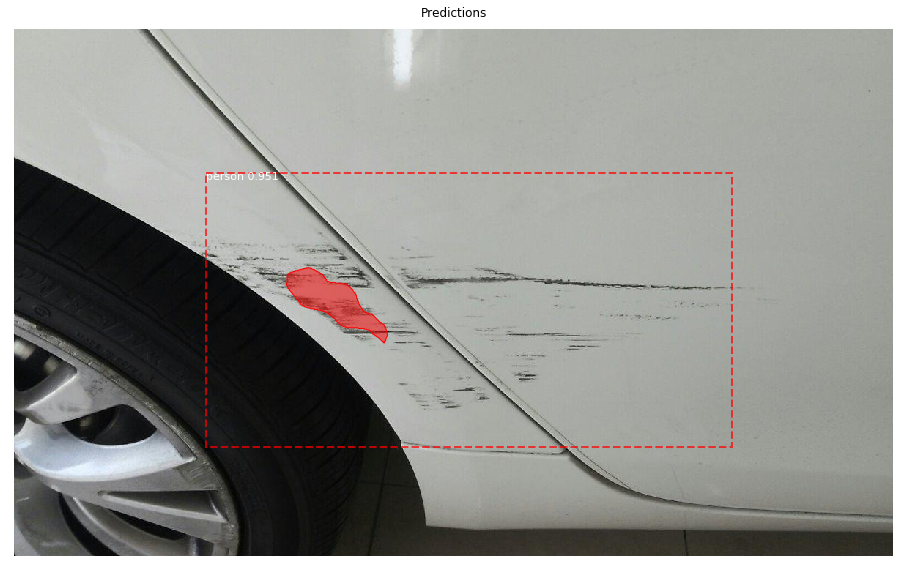

In [3]:
# image_id = random.choice(dataset.image_ids)
# image, image_meta, gt_class_id, gt_bbox, gt_mask =\
# modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
# info = dataset.image_info[image_id]
# print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
#                                        dataset.image_reference(image_id)))
from scipy import misc
# Load a random image from the images folder
img_DIR = os.path.join(custom_DIR, "../static/testimage")
file_names = next(os.walk(img_DIR))[2]
print(file_names)
# image = skimage.io.imread(os.path.join(img_DIR, random.choice(file_names)))
image = misc.imread(os.path.join(img_DIR, random.choice(file_names)))
# Run object detection
results = model.detect([image], verbose=1)

# # Display results
ax = get_ax(1)
r = results[0]
frame = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'], ax=ax,
                            title="Predictions")
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

In [11]:
from sklearn.externals import joblib
import pickle

# joblib.dump(model, 'model.pkl')
pickle.dump(model, open('model.pkl','wb'))

In [14]:
hist.model = None

NameError: name 'hist' is not defined

In [3]:
preds = model.predict(image)

AttributeError: 'MaskRCNN' object has no attribute 'predict'